# Apply denoising Autoencoder for noise removal and obtain clean images.

### Importing Libraries

In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Preparing Dataset

In [2]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Denoising Autoencoder

### Adding noise

In [3]:
# Add random noise
corruption_level = 0.3

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


### Denoising Autoencoder

In [4]:
# Hyper parameters
batch_size = 128
nb_epoch = 25

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 32

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [5]:
# Train
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3144 - val_loss: 0.1699
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1601 - val_loss: 0.1349
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1316 - val_loss: 0.1197
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1190 - val_loss: 0.1127
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1133 - val_loss: 0.1099
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1107 - val_loss: 0.1087
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1095 - val_loss: 0.1080
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1090 - val_loss: 0.1076
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1087 - val_loss: 0.1072
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1082 - val_loss: 0.1070
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1080 - val_loss: 0.1068
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

### Evaluation

In [6]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1061

Summary: Loss over the test dataset: 0.11


### Visualize the reconstruction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


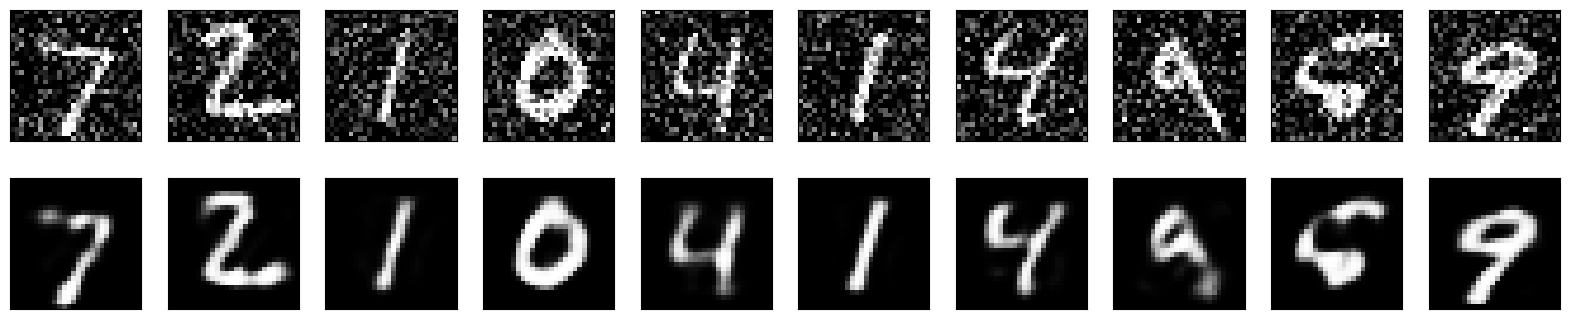

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

dict_keys(['loss', 'val_loss'])


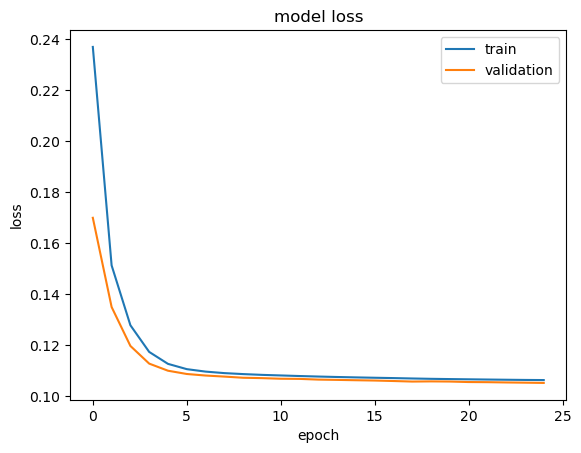

In [8]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()